# Initialization

In [ ]:
try:
    # excecuting in Colab
    from google.colab import drive, runtime
    drive.mount('/content/gdrive', force_remount=True)
    using_colab = True
    root_dir = '/content/gdrive/MyDrive/oc_projet_9'


except:
    # excecuting locally
    using_colab = False
    root_dir = 'D:/OpenClassrooms/projet_9'

Mounted at /content/gdrive


In [ ]:
import os

import numpy as np
import pandas as pd

if using_colab:
    import gdrive.MyDrive.oc_projet_9.scripts.project_9_functions as pf
else:
    import project_9_functions as pf

from IPython.display import clear_output

In [ ]:
if using_colab:
    # colab paths
    clicks_sample_path = 'clicks_sample.csv'
    articles_metadata_path = 'articles_metadata.csv'
    articles_embeddings_path = 'articles_embeddings.pickle'
    clicks_dir_path = 'clicks/'
    clicks_file = 'clicks_hour_'

    zip_path = root_dir + '/data/' + 'news-portal-user-interactions-by-globocom.zip'
    zip_clicks_path = 'clicks.zip'
    path_list = [clicks_sample_path, articles_metadata_path, articles_embeddings_path, clicks_dir_path]

    already_unziped = True
    for path in path_list:
        if not os.path.exists(path):
            print(path)
            already_unziped = False

    if already_unziped:
        print('data already unziped')
    else:
        !unzip $zip_path
        !unzip $zip_clicks_path
        clear_output()


else:
    # local paths
    clicks_sample_path = root_dir + '/data/' + 'clicks_sample.csv'
    articles_metadata_path = root_dir + '/data/' + 'articles_metadata.csv'
    articles_embeddings_path = root_dir + '/data/' + 'articles_embeddings.pickle'
    clicks_dir_path = root_dir + '/data/clicks/'
    clicks_file = 'clicks_hour_'

In [ ]:
test_mode = False

### articles metadata

In [ ]:
articles_metadata = pd.read_csv(articles_metadata_path)
articles_metadata

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


In [ ]:
articles_metadata.describe()

,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000


### clicks

In [ ]:
clicks = pf.get_clicks_df(test_mode, clicks_sample_path, clicks_dir_path)
clicks

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2564,10051,1508211372158328,1508211372000,2,84911,1508211557302,4,3,2,1,25,1
2565,322896,1508211376302329,1508211376000,2,30760,1508211672520,4,1,17,1,25,2
2566,322896,1508211376302329,1508211376000,2,157507,1508211702520,4,1,17,1,25,2
2567,123718,1508211379189330,1508211379000,2,234481,1508211513583,4,3,2,1,25,2


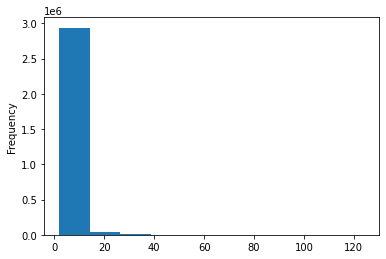

In [ ]:
clicks['session_size'].plot.hist()

In [ ]:
clicks['session_size'].max()

124

In [ ]:
clicks.describe(include='all')

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1506961009961,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601


### articles embeddings

In [ ]:
n_samples = 1000

articles_embeddings = np.load(articles_embeddings_path, allow_pickle=True)
if test_mode:
    articles_embeddings = articles_embeddings[:n_samples,:]

print(articles_embeddings.shape)
print(type(articles_embeddings[0,0]))

(364047, 250)
<class 'numpy.float32'>


In [ ]:
kill_session = False

if kill_session and using_colab:
    # kill colab session
    runtime.unassign()